### Predicción de admisiones de estudiantes con redes neuronales
En esta notebook, predecimos la admisión de estudiantes a la escuela de posgrado a la UCLA en base a tres datos:
- Puntuaciones GRE (prueba)
- Puntajes GPA (Grados)
- Prestigio de la universidad de proveniencia (1-4)

El conjunto de datos originalmente vino de aquí: http://www.ats.ucla.edu/

## Cargando los datos
Para cargar los datos y formatearlos bien, utilizaremos dos paquetes muy útiles llamados Pandas y Numpy. Puede leer la documentación aquí:
- https://pandas.pydata.org/pandas-docs/stable/
- https://docs.scipy.org/

In [1]:
# Importamos Numpy y Pandas
import pandas as pd
import numpy as np

# Importamos Matplotlib y Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creamos un DataFrame de Pandas desde el csv
data = pd.read_csv('student_data.csv')

# Observamos las primeras 10 filas:
data[:10]

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


In [2]:
# Describimos los datos
data.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


C:\Users\feden\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\feden\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\feden\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


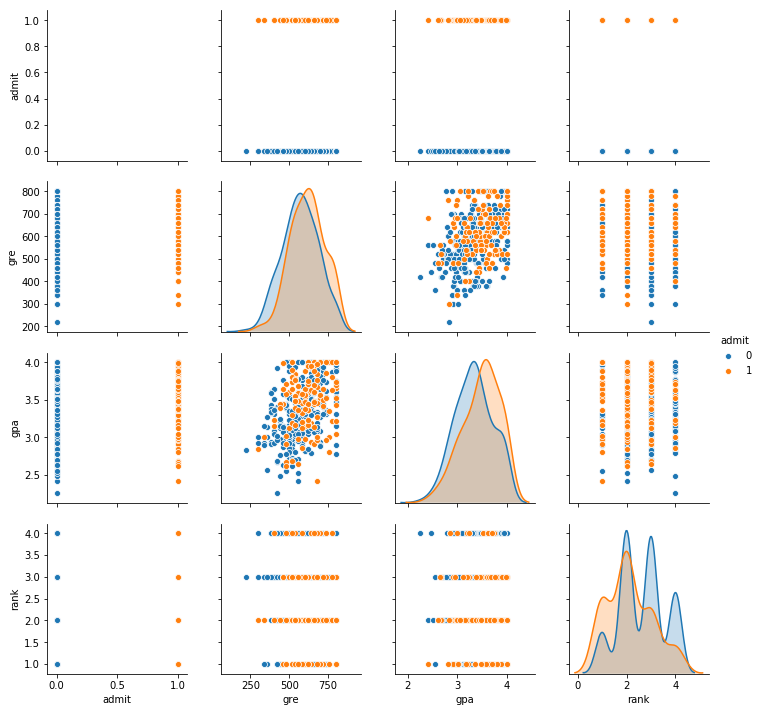

In [3]:
# Visualizamos el pair plot de variables
sns.pairplot(data, hue='admit');

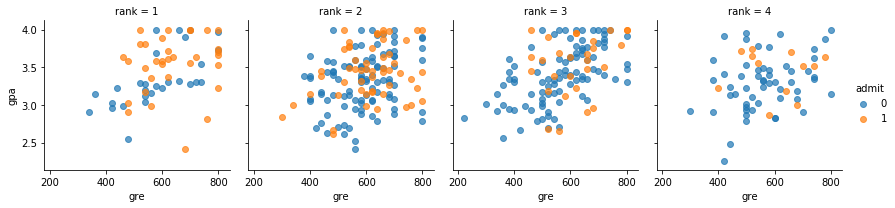

In [4]:
# GRE vs GPA según rank
g = sns.FacetGrid(data, col='rank', hue='admit')
g.map(plt.scatter, 'gre', 'gpa', alpha=.7)
g.add_legend();

In [5]:
# Creamos variables dummy para la variable rank:
one_hot_data = pd.concat([data, pd.get_dummies(data['rank'], prefix='rank', drop_first=True)],\
                         axis=1)

# Dropeamos la columna original de la variable rank:
one_hot_data = one_hot_data.drop('rank', axis=1)

# Observamos las primeras 10 filas del dataset:
one_hot_data[:10]

,admit,gre,gpa,rank_2,rank_3,rank_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1
5,1,760,3.00,1,0,0
6,1,560,2.98,0,0,0
7,0,400,3.08,1,0,0
8,1,540,3.39,0,1,0
9,0,700,3.92,1,0,0


In [6]:
# Hacemos una copia de los datos:
processed_data = one_hot_data[:]

# Normalizamos las variables cuantitativas entre 0 y 1
processed_data['gre'] = processed_data['gre']/800
processed_data['gpa'] = processed_data['gpa']/4.0
processed_data[:10]

,admit,gre,gpa,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,1,0
1,1,0.825,0.9175,0,1,0
2,1,1.000,1.0000,0,0,0
3,1,0.800,0.7975,0,0,1
4,0,0.650,0.7325,0,0,1
5,1,0.950,0.7500,1,0,0
6,1,0.700,0.7450,0,0,0
7,0,0.500,0.7700,1,0,0
8,1,0.675,0.8475,0,1,0
9,0,0.875,0.9800,1,0,0


**Regla del descenso del grandiente**: $ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ donde $\alpha$ es el learning rate y $\theta$ representa un parametro.

**Ilustración**: El algoritmo de descenso de gradiente con una buena tasa de aprendizaje (convergente) y una mala tasa de aprendizaje (divergente). Imágenes cortesía de Adam Harley.

<img src="images/sgd.gif" style="width:400;height:400;"> <img src="images/sgd_bad.gif" style="width:400;height:400;">